# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Ecommerce Sales Dataset](https://www.kaggle.com/datasets/uzmaakhtar/ecommerce-sales-data/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/kaggle/input/ecommerce-sales-data/ecommerce_sales_data.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/ecommerce-sales-data/ecommerce_sales_data.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


## last Five row

In [4]:
df.tail()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
3495,2023-02-15,Monitor,Accessories,North,4,4064,771.16
3496,2022-09-18,Monitor,Accessories,East,1,1117,119.89
3497,2022-04-12,Laptop,Electronics,South,4,260,66.02
3498,2022-01-18,Printer,Office,South,3,222,50.28
3499,2024-11-01,Smartwatch,Electronics,East,9,10530,1777.32


## Shape of our dataset

In [5]:
df.shape

(3500, 7)

## List out all columns

In [6]:
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Order Date       object
Product Name     object
Category         object
Region           object
Quantity          int64
Sales             int64
Profit          float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


## Check Null Value

In [9]:
df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

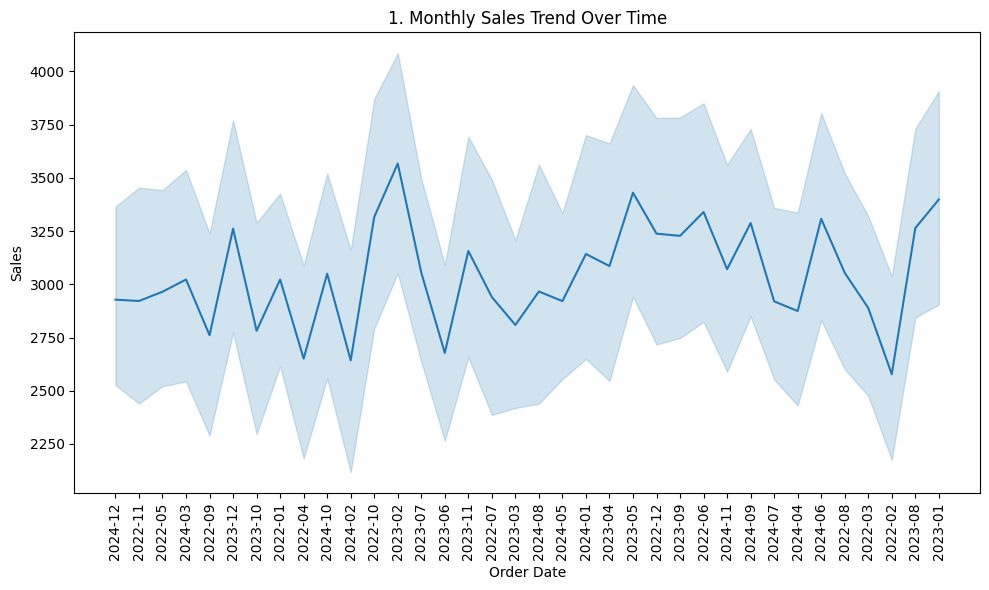

In [13]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.to_period('M').astype(str), y=df['Sales'])
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Monthly Sales Trend Over Time')
show_fig()
plot_no += 1


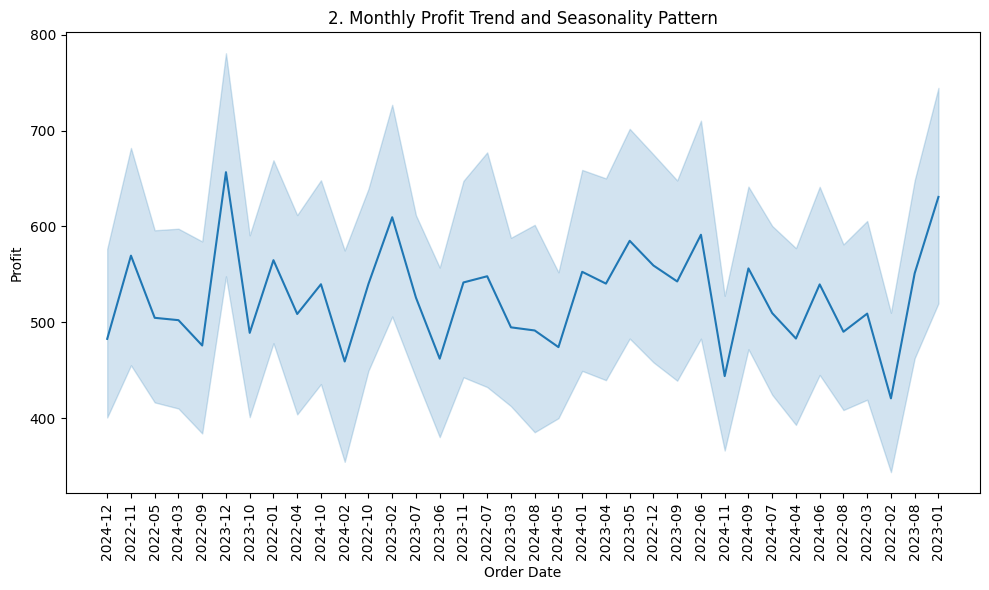

In [14]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.to_period('M').astype(str), y=df['Profit'])
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Monthly Profit Trend and Seasonality Pattern')
show_fig()
plot_no += 1


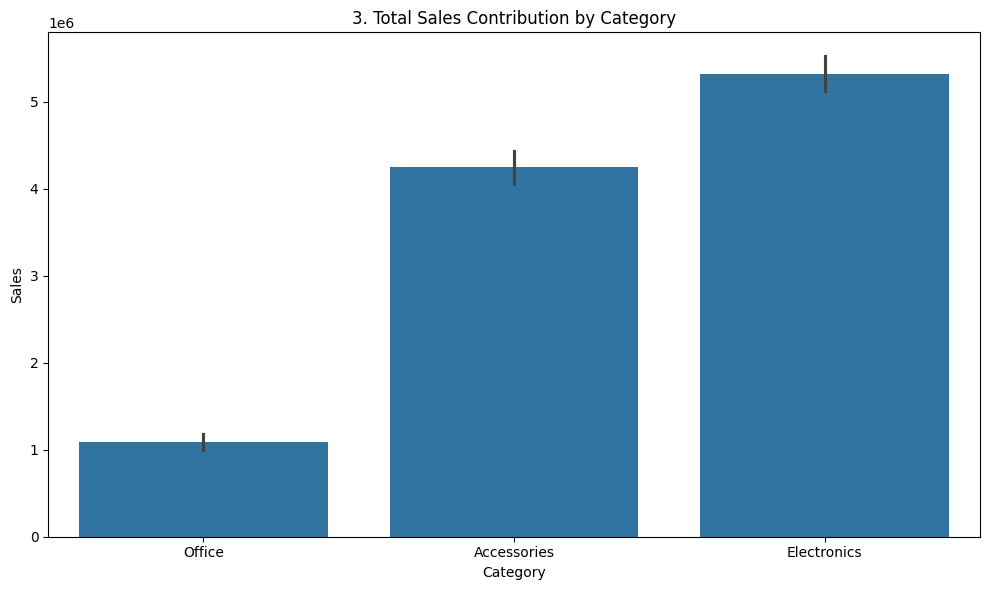

In [15]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title(f'{plot_no}. Total Sales Contribution by Category')
show_fig()
plot_no += 1


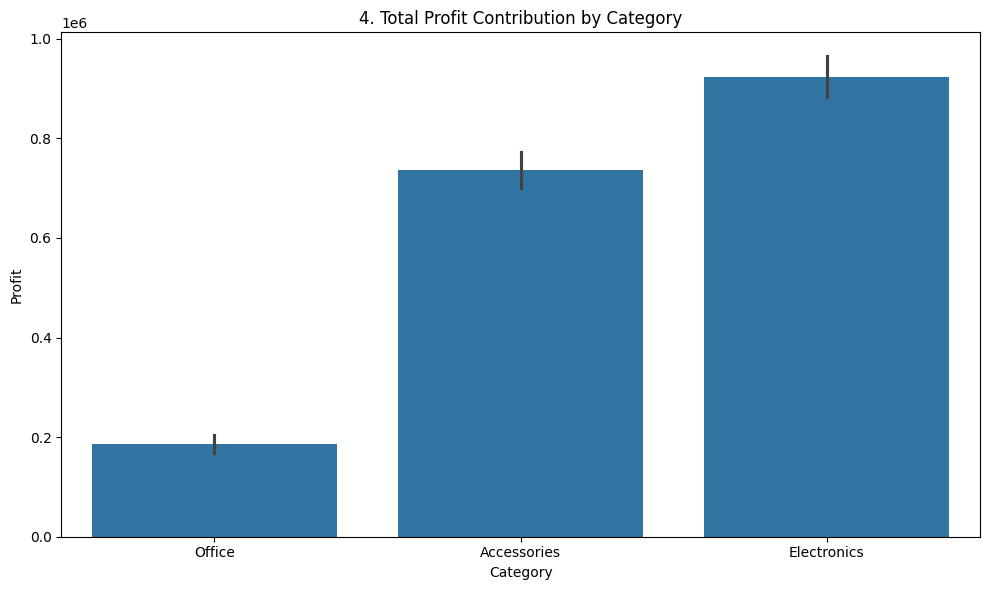

In [16]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum)
plt.title(f'{plot_no}. Total Profit Contribution by Category')
show_fig()
plot_no += 1


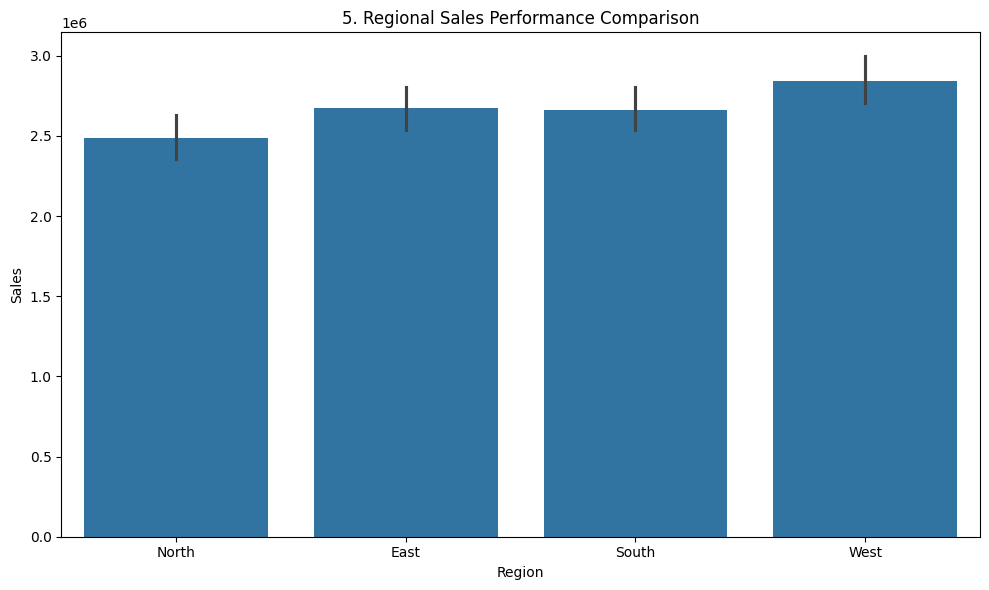

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title(f'{plot_no}. Regional Sales Performance Comparison')
show_fig()
plot_no += 1


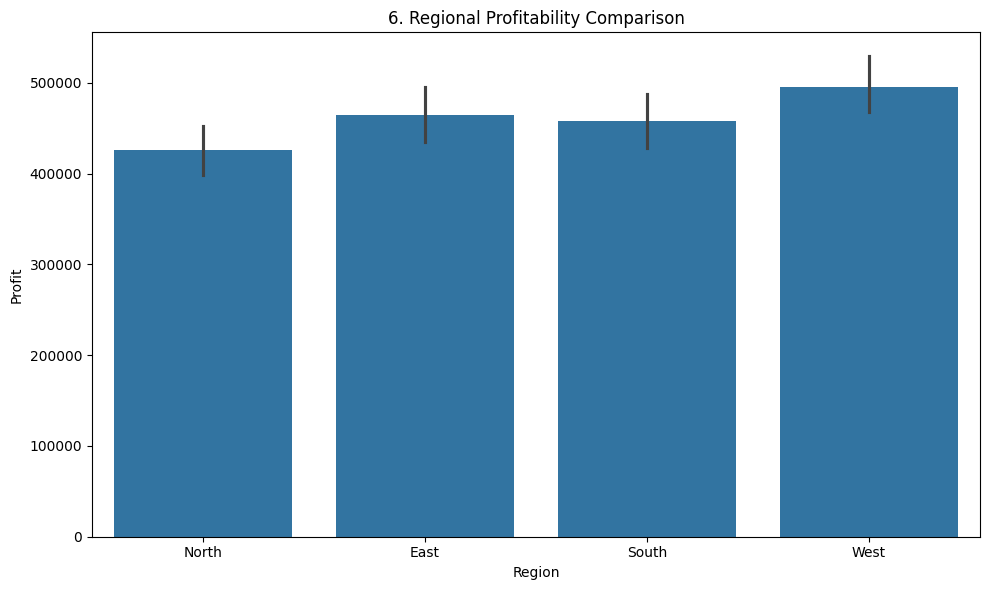

In [18]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title(f'{plot_no}. Regional Profitability Comparison')
show_fig()
plot_no += 1


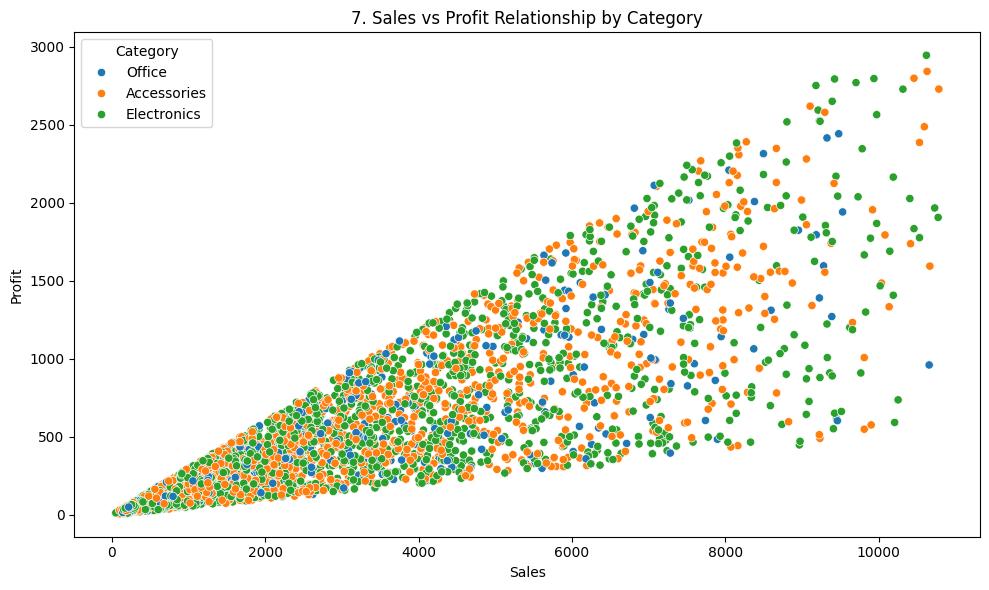

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title(f'{plot_no}. Sales vs Profit Relationship by Category')
show_fig()
plot_no += 1


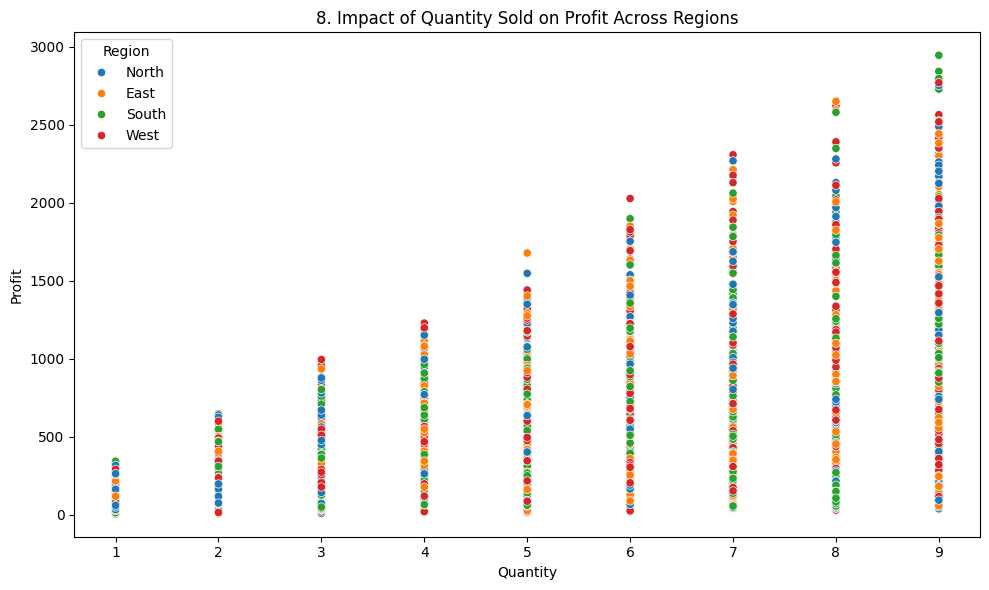

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', hue='Region', data=df)
plt.title(f'{plot_no}. Impact of Quantity Sold on Profit Across Regions')
show_fig()
plot_no += 1


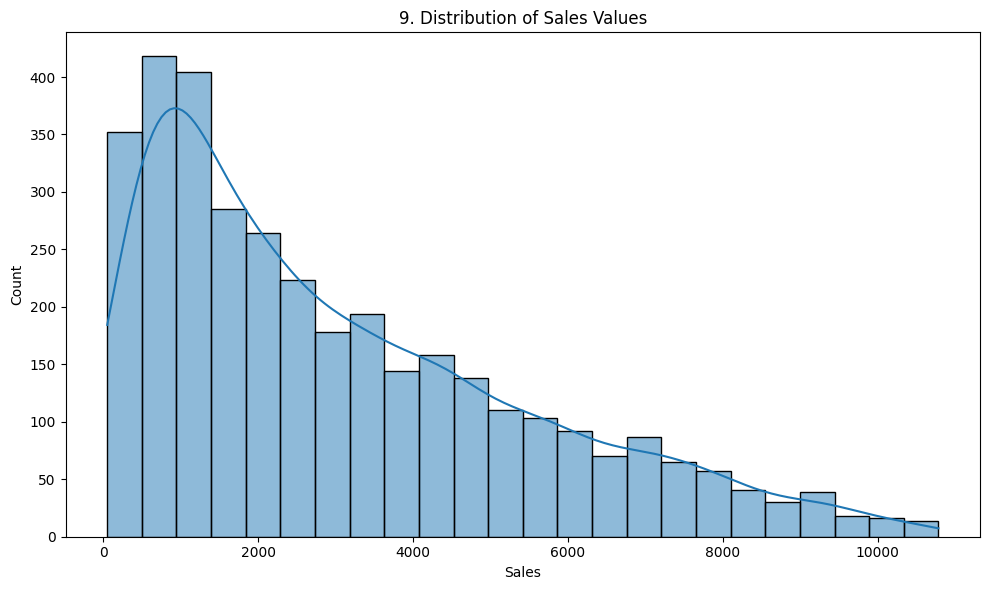

In [21]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True)
plt.title(f'{plot_no}. Distribution of Sales Values')
show_fig()
plot_no += 1


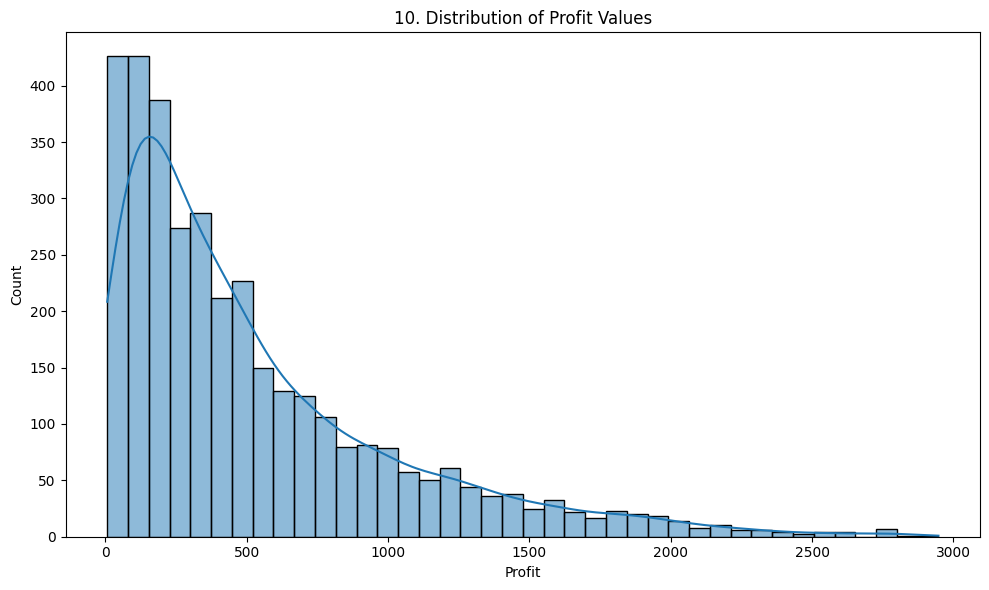

In [22]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], kde=True)
plt.title(f'{plot_no}. Distribution of Profit Values')
show_fig()
plot_no += 1


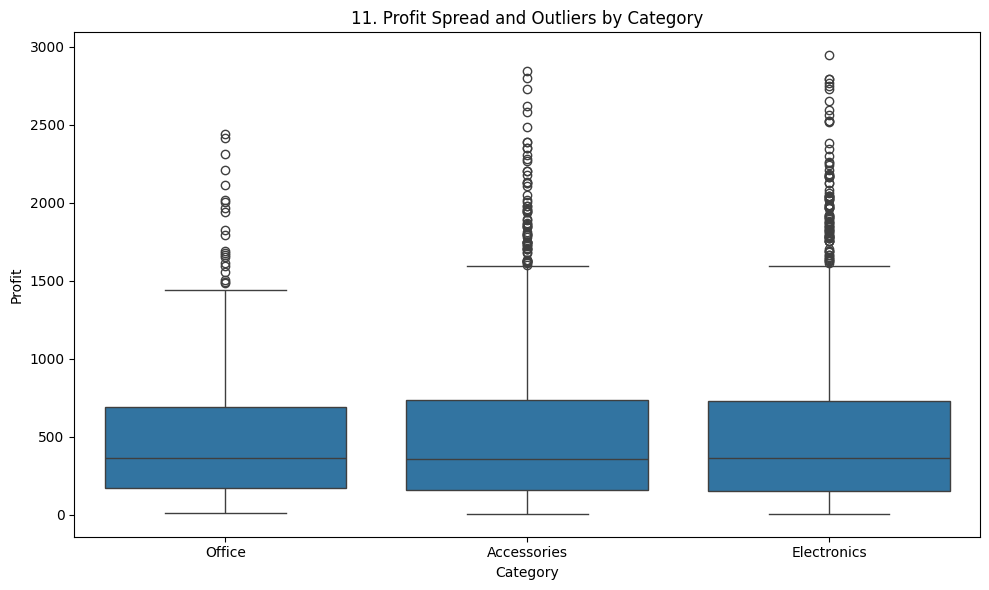

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title(f'{plot_no}. Profit Spread and Outliers by Category')
show_fig()
plot_no += 1


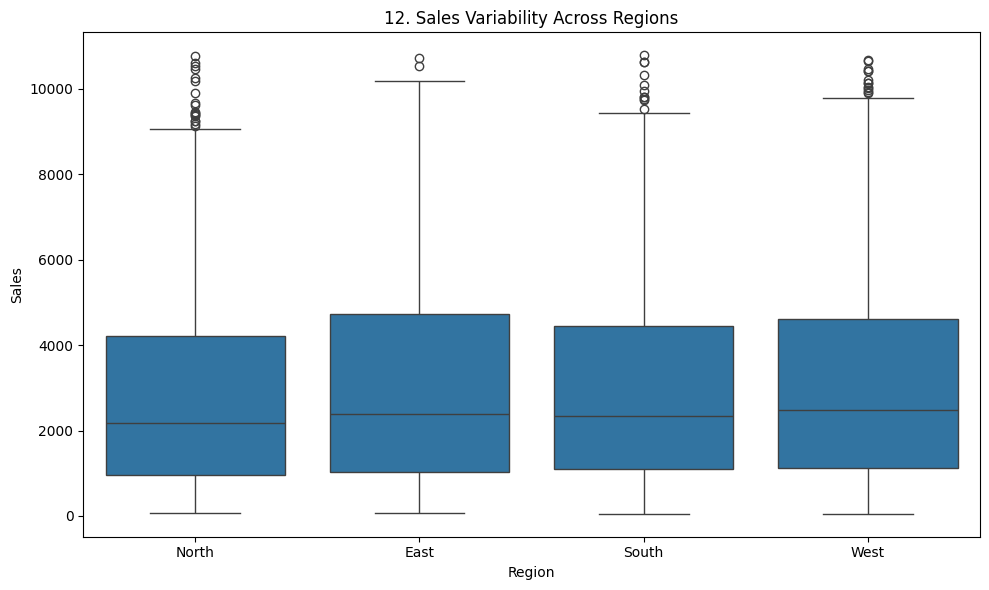

In [24]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title(f'{plot_no}. Sales Variability Across Regions')
show_fig()
plot_no += 1


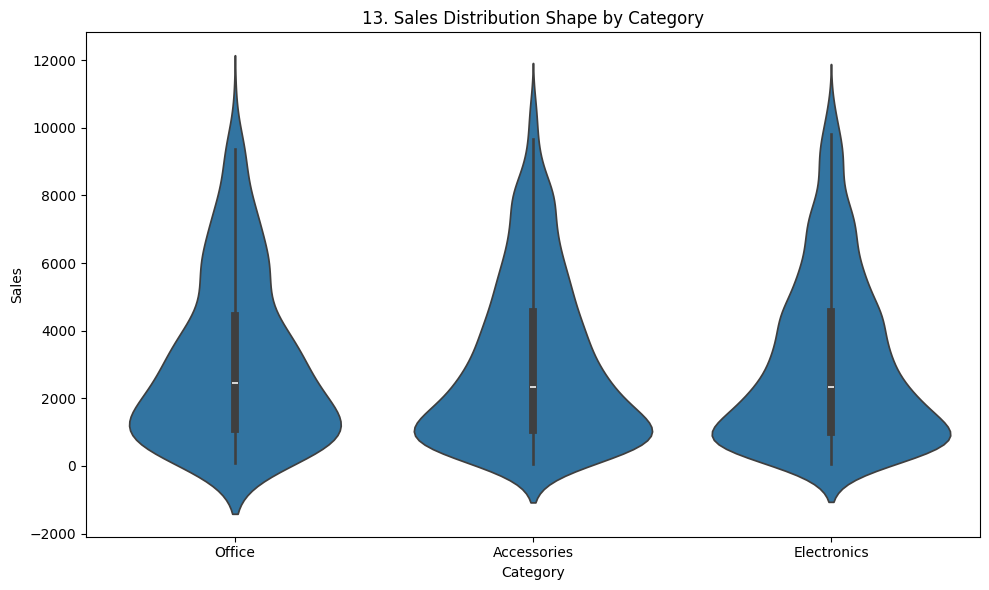

In [25]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='Category', y='Sales', data=df)
plt.title(f'{plot_no}. Sales Distribution Shape by Category')
show_fig()
plot_no += 1


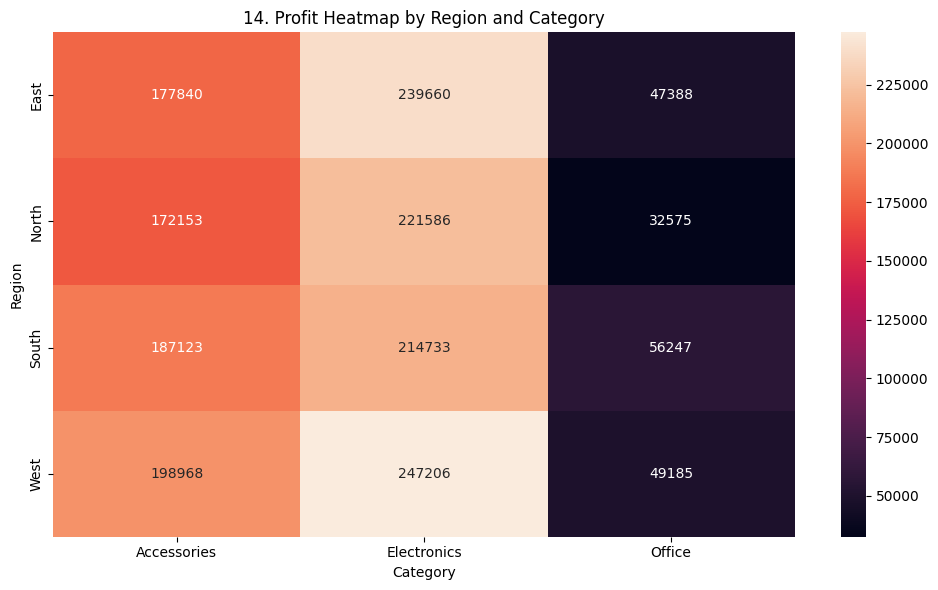

In [26]:
fig = plt.figure(figsize=(10,6))
pivot_table = df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f')
plt.title(f'{plot_no}. Profit Heatmap by Region and Category')
show_fig()
plot_no += 1


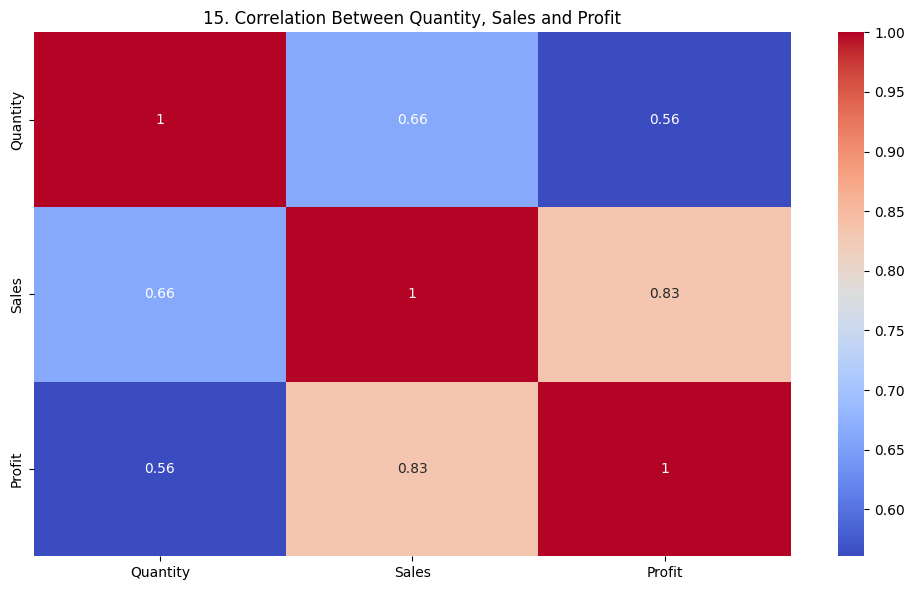

In [27]:
fig = plt.figure(figsize=(10,6))
corr = df[['Quantity','Sales','Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Between Quantity, Sales and Profit')
show_fig()
plot_no += 1


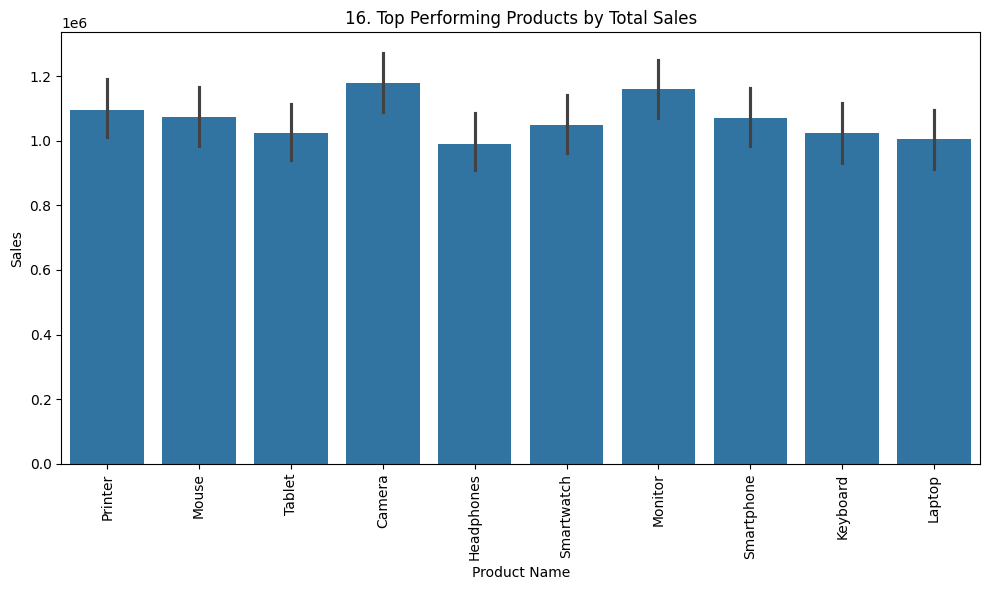

In [28]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Product Name', y='Sales', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Top Performing Products by Total Sales')
show_fig()
plot_no += 1


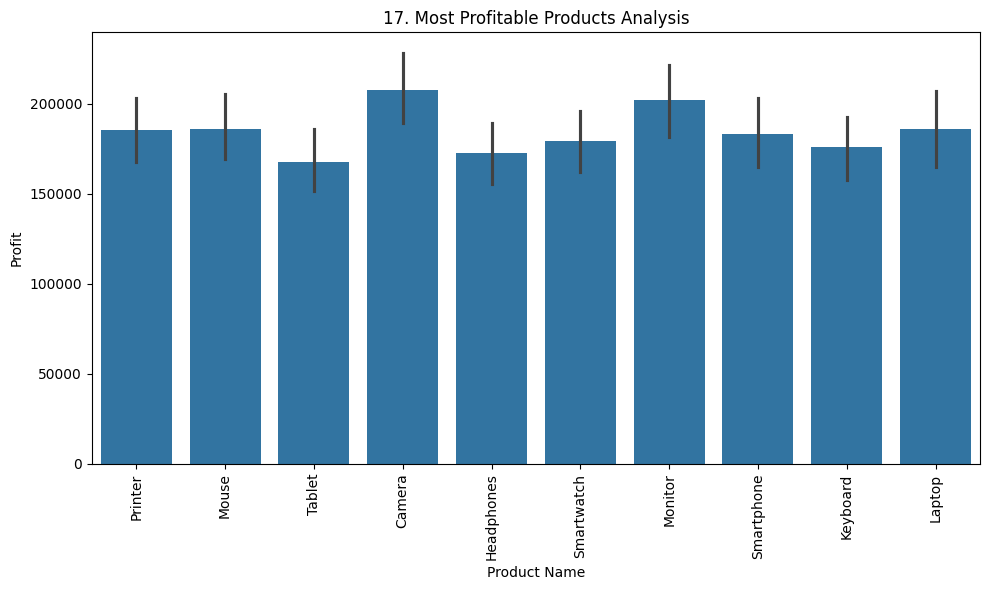

In [29]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Product Name', y='Profit', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Most Profitable Products Analysis')
show_fig()
plot_no += 1


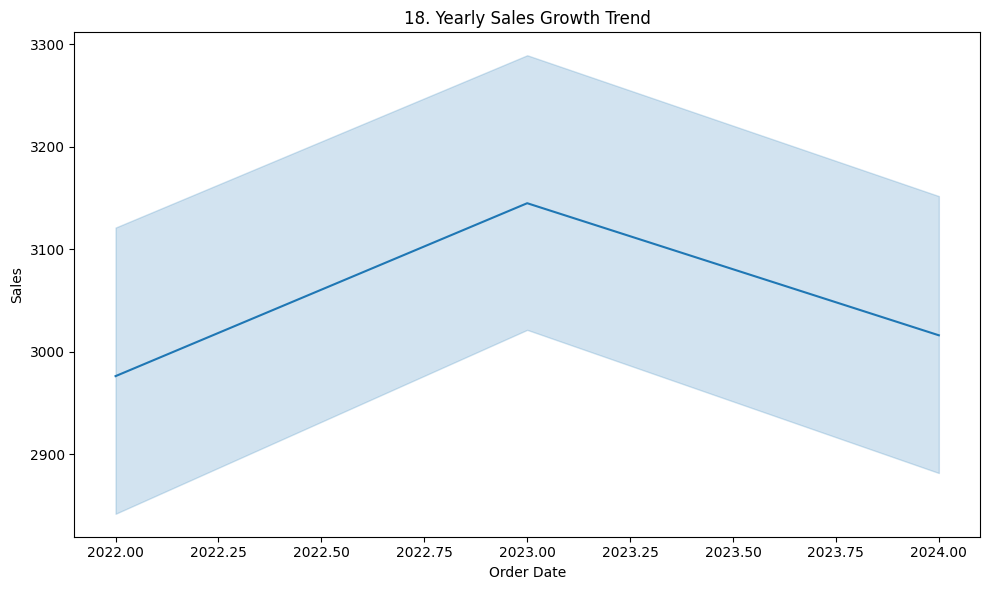

In [30]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.year, y=df['Sales'])
plt.title(f'{plot_no}. Yearly Sales Growth Trend')
show_fig()
plot_no += 1


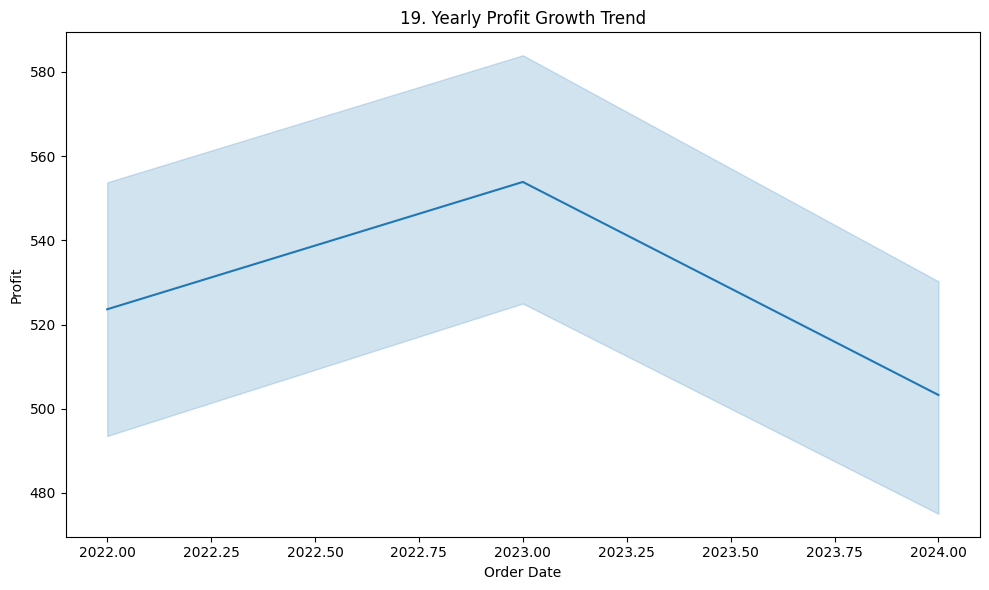

In [31]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=pd.to_datetime(df['Order Date']).dt.year, y=df['Profit'])
plt.title(f'{plot_no}. Yearly Profit Growth Trend')
show_fig()
plot_no += 1


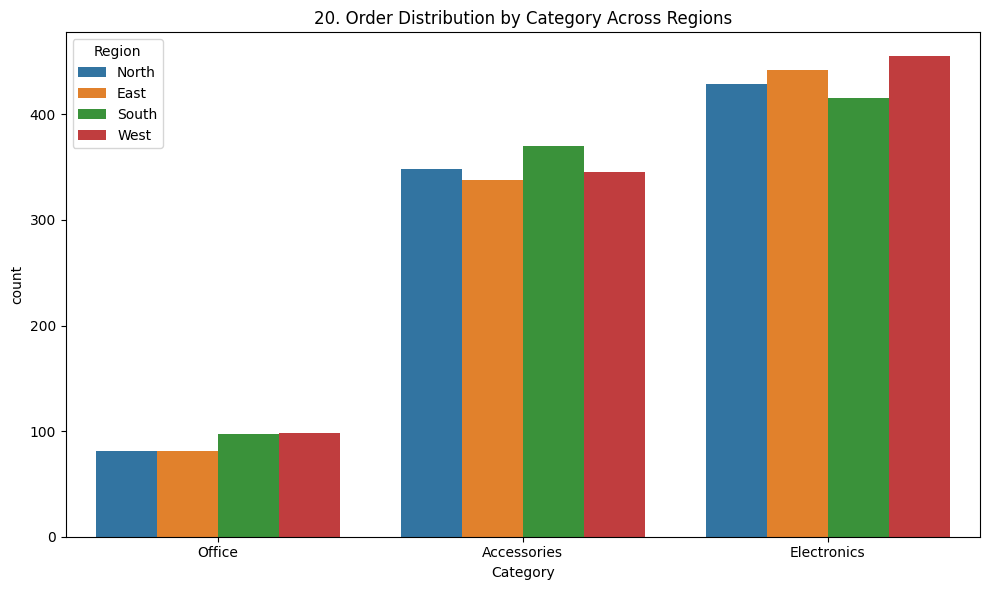

In [32]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Category', hue='Region', data=df)
plt.title(f'{plot_no}. Order Distribution by Category Across Regions')
show_fig()
plot_no += 1


# Model Training

## Convert Order Date into useful time features

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

## Encode categorical features

In [34]:
le_product = LabelEncoder()
le_category = LabelEncoder()
le_region = LabelEncoder()

df['Product Name'] = le_product.fit_transform(df['Product Name'])
df['Category'] = le_category.fit_transform(df['Category'])
df['Region'] = le_region.fit_transform(df['Region'])

## Define features and target (Predicting Category)

In [35]:
X = df[['Product Name','Region','Quantity','Sales','Profit','Year','Month','Day','DayOfWeek']]
y = df['Category']

## Split dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale features

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Gradient Boosting model

In [38]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

## Predict

In [39]:
y_pred = model.predict(X_test)

## Print performance

In [40]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       354
           2       1.00      1.00      1.00        77

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



## Plot confusion matrix

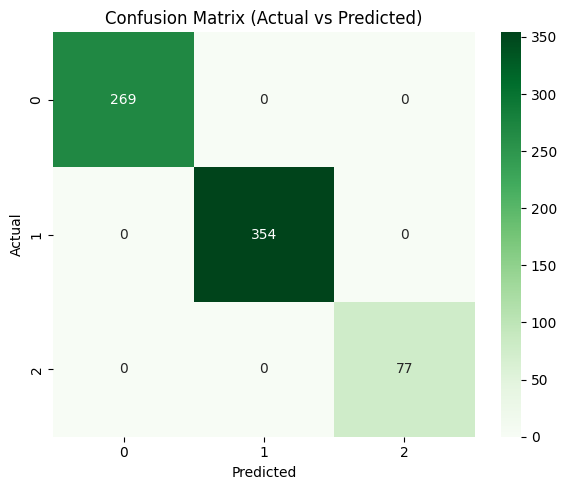

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Actual vs Predicted)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()